# Выбор гипотез и анализ A/B-теста.
**Описание проекта**   
С целью увеличения выручки крупного интернет-магазина совместно с отделом маркетинга подготовлен список гипотез. Необходимо выбрать гипотезу, проанализировать результаты эксперимента. 
____
 **Исходные данные:**  
 - список с кратким описанием гипотез с различными параметрами;
 - файл с результатами A/B-теста.  
___
 **Цель проекта:**  
 - Приоритизировать в зависимости от параметров гипотезы из списка;
 - Проанализировать и сделать вывод по результатам A/B-теста.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Приоритизация гипотез

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Описание данных:**  
Файл `hypothesis`:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
data.columns = data.columns.str.lower() #заменим заглавные буквы на прописные в названии столбцов

## Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
data['ICE'] = (data['confidence'] * data['impact']) / data['efforts']

In [6]:
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)  #.style.format({'ICE': '{:.1f}'})

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


## Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
data['RICE'] = (data['confidence'] * data['impact']* data['reach']) / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)  

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Приоритизация гипотез при применении RICE вместо ICE изменилась, так как при расчете RICE дополнительно учитывается такой параметр как `Reach` — скольких пользователей затронет изменение, которое мы хотим внести. С учетом этого праметра гипотезы, которые имеют более широкий охват пользователей получили более высокую оценку.**

# Анализ A/B-теста

Тестируем гипотезу: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".
Мы получили результаты A/B-теста, которые описаны в файлах `orders` и `visitors`. Нам необходимо проанализировать результаты и  принять решение по результатам A/B-теста.

## Изучение, подготовка данных.

Загрузим данные и изучим их.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
def inform(data):
    display(data.head())
    print(data.info())

In [10]:
inform(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


In [11]:
inform(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


**Описание данных:** 

Файл `orders`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Файл `visitors`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Подготовка данных**

Переименуем некоторые столбцы. Приведем в змеиный регистр названия.

In [12]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Приведение данных к нужным типам:

In [13]:
# преобразование данных времени
visitors['date'] = pd.to_datetime(visitors['date']).dt.date
orders['date'] = pd.to_datetime(orders['date']).dt.date

**Проверим наличие дубликатов**

In [14]:
orders.duplicated().sum()

0

**Посмотрим на размер выборок и время провведения теста**

По условию задачи тест уже запущен, считаем что размер выборок и длительность теста определены оптимальным образом.

Тест проводился в течении месяца:

In [15]:
print('Период проведения теста:', f" с {orders['date'].min()} по {orders['date'].max()}" )

Период проведения теста:  с 2019-08-01 по 2019-08-31


Посмотрим на размеры исследуемых выборок.

In [16]:
orders.groupby('group').agg({'visitor_id':'nunique'})

,visitor_id
group,
A,503
B,586


Размеры выборок достаточно большие, но не равны, что встречается достаточно часто. Это не является критическим нарушением.

Чтобы получить статистически значимый результат, очень важно исключить влияние групп друг на друга, т.е. пользователь должен быть отнесен строго к одной группе. Проверим это требование.

In [17]:
visitor_a = orders[orders['group'] == 'A']['visitor_id'].unique()
visitor_b = orders[orders['group'] == 'B']['visitor_id'].unique()
diff_vis = [x for x in visitor_a if x in visitor_b]
print('Количество пользователей, попавших в обе группы:', len(diff_vis))

Количество пользователей, попавших в обе группы: 58


А вот это серьезное нарушение.   
Мы могли бы удалить данных пользователей из выборок. Но нам необходимо будет оценить конверсию из посетителей. А в таблице `visitors` эти пользователи учтены в общем количестве пользователей за день. Поэтому удаление повлияет на показатель конверсии.

Ввиду того, что без последствий удалить пользователей из всех выборок не получиться, оставим их. Доля таких пользователей не очень большая, возможно они окажут не сильное влияние на результат. Мы проведем анализ с учетом этих пользователей, но будем иметь ввиду что этот факт может повлиять на результат тестирования.

## Построим график кумулятивной выручки по группам

Подготовим данные для графика.

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах:

In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях:

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну:

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

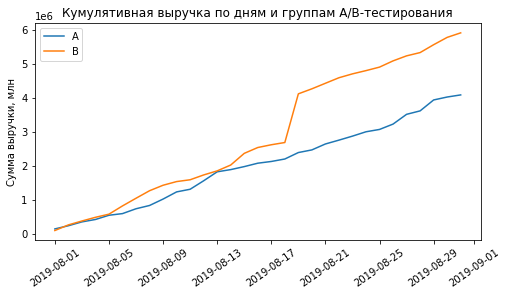

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(8,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Сумма выручки, млн')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xticks(rotation=35)
plt.show()

Выручка почти равномерно увеличивается в течение всего теста.
Но график выручки группы В имеет резкий рост. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

## Построим графики среднего чека по группам.

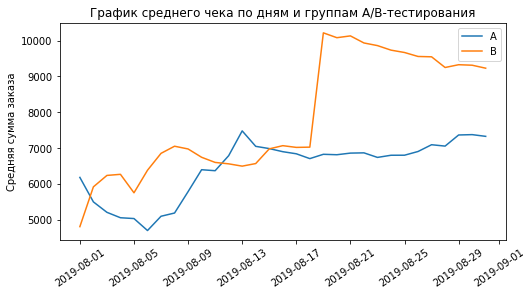

In [24]:
plt.figure(figsize=(8,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Средняя сумма заказа')
plt.title('График среднего чека по дням и группам A/B-тестирования')
plt.legend()
plt.xticks(rotation=35)
plt.show()

Со средним чеком наблюдается выраженный скачок в середине месяца в группе `В`. В один из дней в этой группе появился дорогой заказ или несколько. Мы видим что, после этого скачка средний чек группы `В` стал снижаться, а средний чек группы `А` наооборот стал немного расти. Не будь этого скачка средний чек группы `В` мог оказатся ниже среднего чека группы `А` к концу периода.

## Построим график относительного различия для среднего чека.

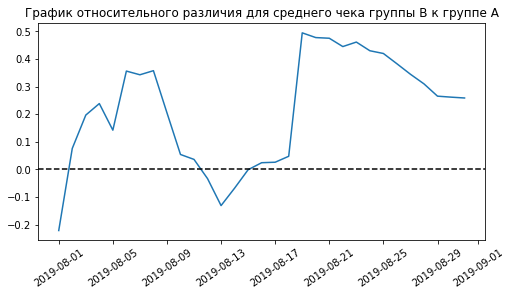

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=35)
plt.title('График относительного различия для среднего чека группы B к группе A')
plt.show()

Здесь мы также наглядно видим влияние выбросов. График различия между сегментами резко «скачет».

## Построим график кумулятивной конверсии по группам.

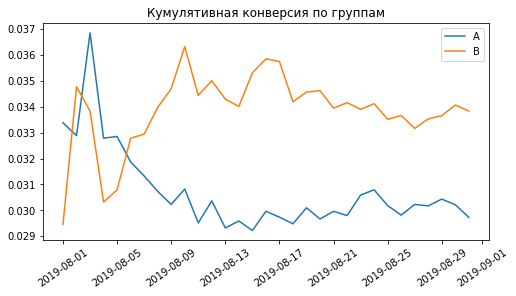

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(8,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=35)
plt.title('Кумулятивная конверсия по группам')
plt.show()

Мы видим что конверсия группы `В` после резких колебаний в начале периода стабилизировалась выше конверсии группы `А`.

## Построим график относительного изменения кумулятивной конверсии группы B к группе A.

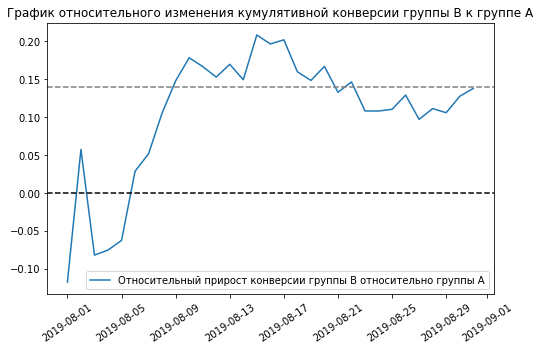

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.xticks(rotation=35)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом с середины было небольшое снижение но ближе к концу теста она снова растет.

## Построим точечный график количества заказов по пользователям.

In [28]:
orders_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_users.columns = ['user', 'orders']

orders_users.head()

,user,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


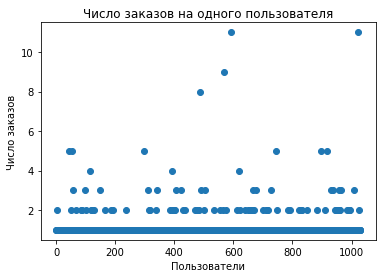

In [29]:
x_values = pd.Series(range(0,len(orders_users['orders'])))
plt.scatter(x_values, orders_users['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.title('Число заказов на одного пользователя')
plt.show()

Большая часть пользователей оформляла не больше трех заказов.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [30]:
print(np.percentile(orders_users['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.  
Выберем границу для определения аномальных пользователей 2 или 3 заказа на пользователей. 

## Построим точечный график стоимостей заказов.

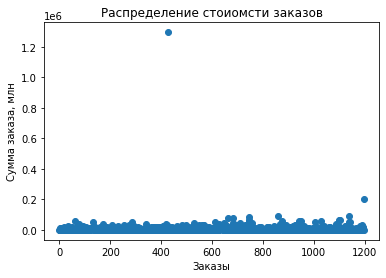

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Сумма заказа, млн')
plt.title('Распределение стоиомсти заказов')
plt.show()

Вот и выброс, который проявлялся на графиках среднего чека и кумулятивной выручки. Очень крупный заказ в десятки раз превосходящий большинство заказов. Из-за этого выброса не ясно какое распределение по стоимости заказов до 200 000. Можно изменить масштаб и поближе рассмотреть распределение сумм заказов в нижней части графика.

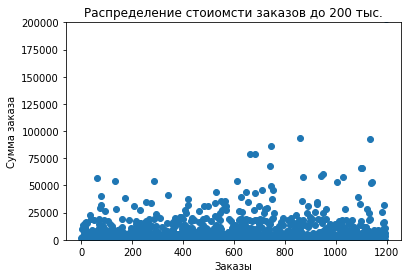

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,200000)
plt.xlabel('Заказы')
plt.ylabel('Сумма заказа')
plt.title('Распределение стоиомсти заказов до 200 тыс.')
plt.show()

Теперь мы видим что большинство сумм заказов не превышает 25-30 тыс. руб. Установим точные границы с помощью процентиля.

## Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [33]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Для отсечения будем использовать 99% квантиль.

## Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Подготовим данные для последующих проверок. По каждой группе выведем количество заказов, выручку и количество пользователей в выбранную дату. А также все эти показатели нарастающим итогом для каждой даты.

In [34]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы:
$\begin{equation*}
 \begin{cases}
   H_0 :\text{Различий в конверсии между группами нет}\\
   H_1 :\text{Различия в конверсии между группами есть}
 \end{cases}
\end{equation*}$


Уровень значимости: $\alpha = 0.05$

Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA и SampleB.

In [37]:
import scipy.stats as stats
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост конверсии группы B: 0.138


P-value меньше 0.05 Поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:
$\begin{equation*}
 \begin{cases}
   H_0 :\text{Различий в среднем чеке между группами нет}\\
   H_1 :\text{Различия в среднем чеке между группами есть}
 \end{cases}
\end{equation*}$


Уровень значимости: $\alpha = 0.05$

И найдём относительные различия в среднем чеке между группами:

In [38]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительные различия в среднем чеке между группами: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

## Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Очистим данные.  

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 233 рублей. Так мы уберём меньше 1% пользователей с наибольшим числом заказов и до 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 и пользователей, совершивших заказы дороже 58 233.

In [39]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_users['orders'], 99)]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_users['orders'], 99)]['user_id']],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

(15,)


Всего 15 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста.

Подготовим выборки количества заказов по пользователям по группам теста:

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series( 0,index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),], axis=0,)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series( 0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',), ], axis=0,)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [41]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.014
Относительный прирост конверсии группы B: 0.153


Результаты по конверсии практически не изменились.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [42]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],
        )[1]))

print('Относительные различия в среднем чеке между группами:',"{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean() - 1))

p-value = 0.851
Относительные различия в среднем чеке между группами: -0.006


P-value увеличился, как и в случае с "сырыми" данными мы не можем отвергнуть нулевую гипотезу. Но разница между группами в среднем чеке снизилась значительно, теперь группа В даже немного проигрывает, что вполне логично после того как мы убрали выбросы по стоимости заказов.

# Общий вывод:

**Выявленные факты:**
- Обнаружено влияние групп друг на друга, найдены пользователи, которые отнесены к двум сравниваемым группам;
- Статистически значимое различие по конверсии между группами есть и по «сырым», и по данным после фильтрации аномалий. На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Сравнение относительного изменения конверсии между группами показывает, что результаты группы B лучше группы A;
- График различия среднего чека колеблется: что и позволило нам найти аномалии. Сделать из этого графика определённые выводы нельзя. 

Исходя из обнаруженных фактов, тест следует остановить и признать более успешной группу В, но с оговорками.  
Целью изменений было повысить конверсию и средний чек заказа. Из результатов эксперимента можно говорить лишь о статичтически значимых изменениях в конверсии. На средний чек в этом эксперименте повлиять не удалось. В результате принятия успеха группы В мы можем рассчитывать на увеличение выручки за счет увеличения конверсии при том, что средний чек не измениться. Но при всем при этом стоит учитывать допущенную ошибку при делении пользователей на группы. Эта ошибка могла повлиять на статистическую значимость результата.